# Упражнение 3
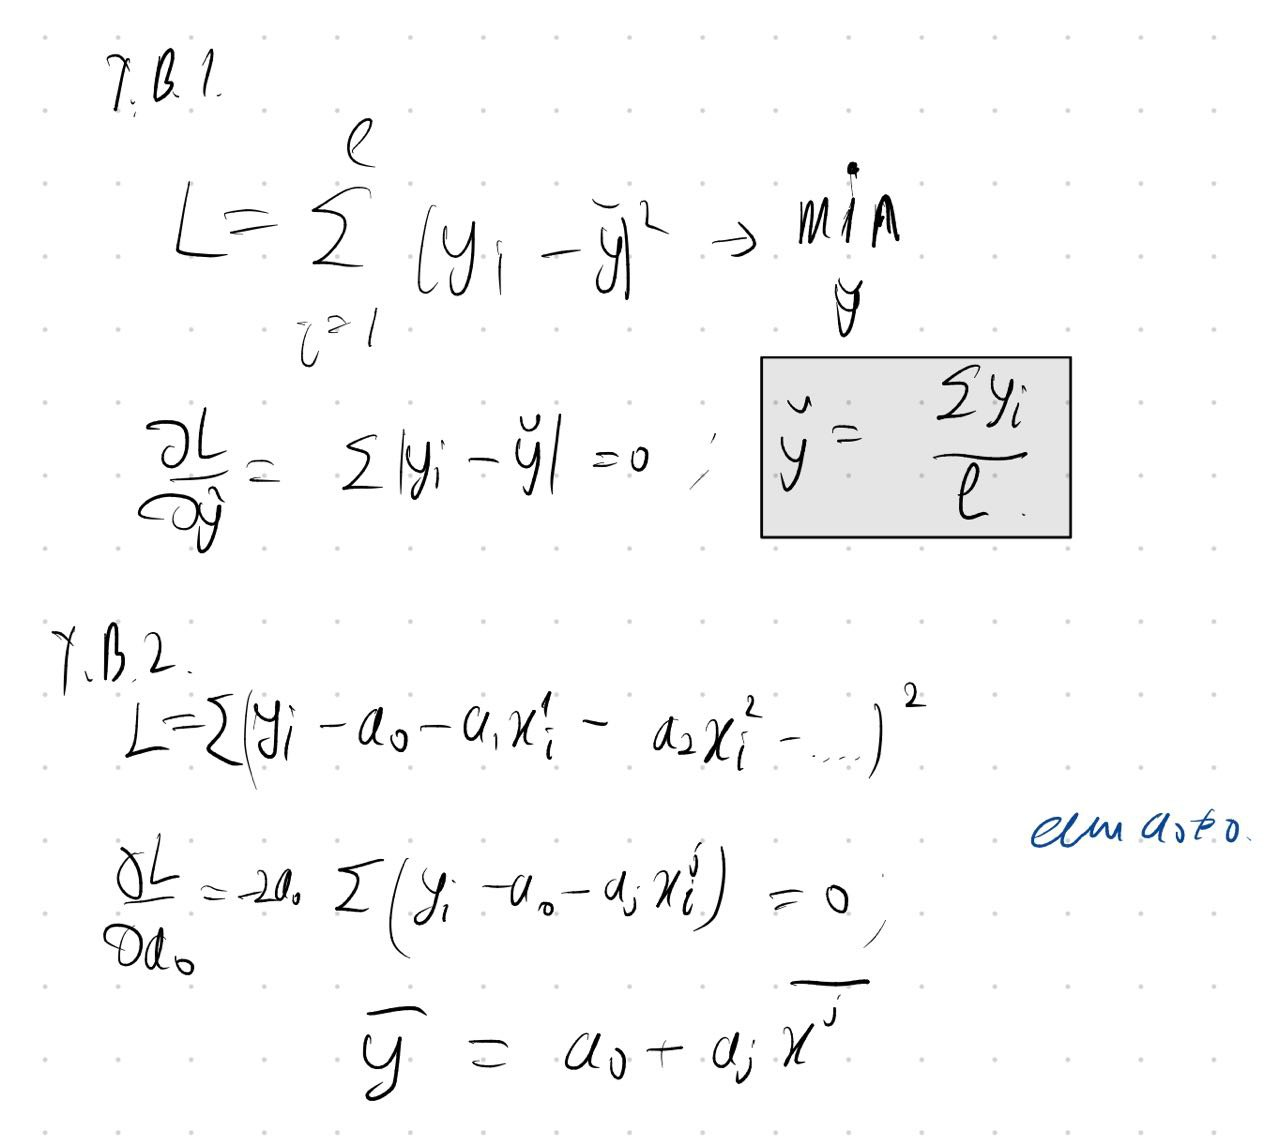

  dataset  var_x     var_y  pearson_corr
0       I   11.0  4.127269      0.816421
1      II   11.0  4.127629      0.816237
2     III   11.0  4.122620      0.816287
3      IV   11.0  4.123249      0.816521


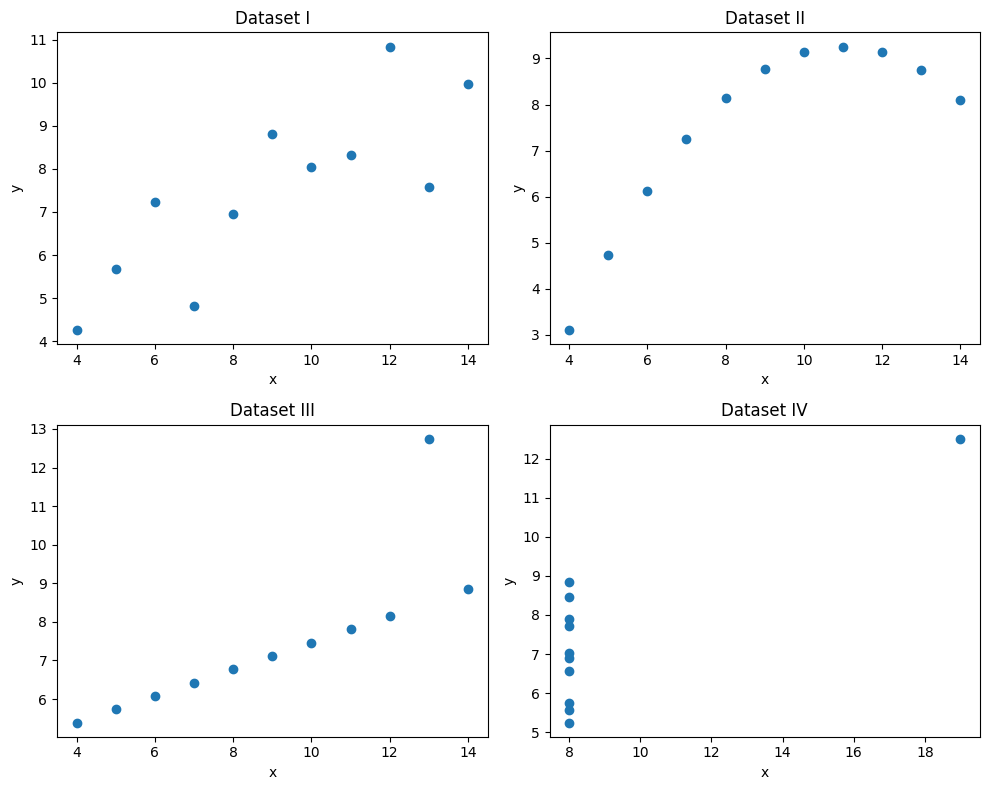

In [6]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

df = sns.load_dataset('anscombe')

groups = df['dataset'].unique()


results = []
for group in groups:
    data = df[df['dataset'] == group]
    var_x = data['x'].var(ddof=1)
    var_y = data['y'].var(ddof=1)
    corr = data['x'].corr(data['y'])
    results.append({'dataset': group, 'var_x': var_x, 'var_y': var_y, 'pearson_corr': corr})

results_df = pd.DataFrame(results)
print(results_df)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for ax, group in zip(axs.flatten(), groups):
    data = df[df['dataset'] == group]
    ax.scatter(data['x'], data['y'])
    ax.set_title(f'Dataset {group}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
plt.tight_layout()
plt.show()

# упражнение 3

# Упражнение 4
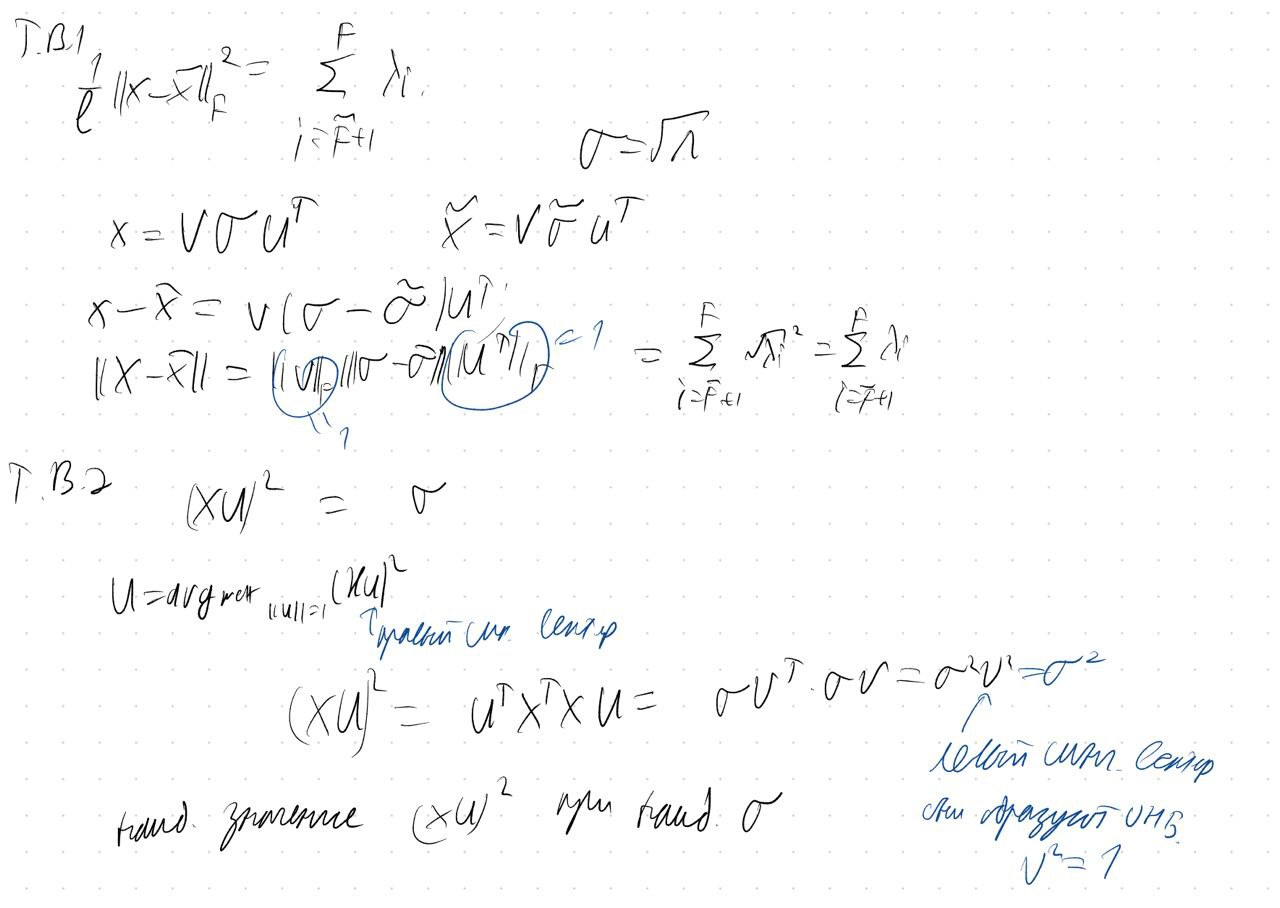

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Параметры
np.random.seed(0)
N = 1000

# Шаг 1: Генерация случайной симметричной матрицы A (3x3)
B = np.random.randn(3, 3)
A = B @ B.T  # A теперь симметричная и положительно определенная

# Шаг 2: Генерация точек с распределением P ∝ exp(-xᵀAx)
# Это многомерное нормальное распределение с нулевым средним и ковариацией A⁻¹
mean = np.zeros(3)
cov = np.linalg.inv(A)  # Ковариационная матрица
X = np.random.multivariate_normal(mean, cov, size=N)  # X: (N x 3)

# Шаг 3: PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
components = pca.components_        # Сингулярные (главные) векторы (3 x 3)
explained = pca.explained_variance_ # Сингулярные значения^2

# Шаг 4: Визуализация

# 3D-график с главными компонентами
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Облако точек
ax.scatter(X[:, 0], X[:, 1], X[:, 2], alpha=0.3)

# Рисуем главные компоненты как стрелки из центра
center = X.mean(axis=0)
for i in range(3):
    vec = components[i] * np.sqrt(explained[i]) * 3  # масштаб
    ax.quiver(center[0], center[1], center[2],
              vec[0], vec[1], vec[2],
              color=['r', 'g', 'b'][i],
              linewidth=3)

ax.set_title("3D облако точек + главные компоненты")
plt.show()

# 2D-проекции на первые две главные компоненты
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3)
plt.title("Проекция на первые две главные компоненты")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.axis('equal')
plt.show()

ModuleNotFoundError: No module named 'sklearn'

In [10]:
import sympy
f = sympy.Function("f")
x,h = sympy.symbols("x h")
f(x-2*h).series(h, x0=x, n=6)


f(-x) - 2*(h - x)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, -x) + 2*(h - x)**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, -x) - 4*(h - x)**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, -x)/3 + 2*(h - x)**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, -x)/3 - 4*(h - x)**5*Subs(Derivative(f(_xi_1), (_xi_1, 5)), _xi_1, -x)/15 + O((h - x)**6, (h, x))